# Oja's PCA 压缩lenna

## 1.读取图像

In [5]:
from PIL import Image
import numpy as np
image = Image.open("lenna.png")

print(image.mode)
print(image.size)

RGB
(512, 512)


### 1.1展示图像

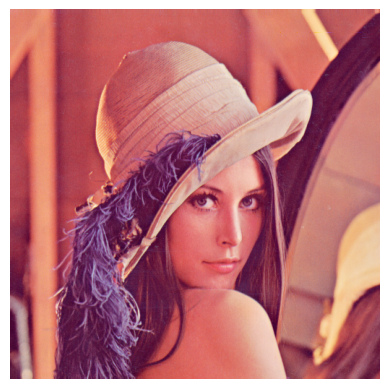

In [2]:
import matplotlib.pyplot as plt

image = Image.open("lenna.png")

plt.imshow(image)
plt.axis('off')
plt.show()


### 1.2转换为灰度图

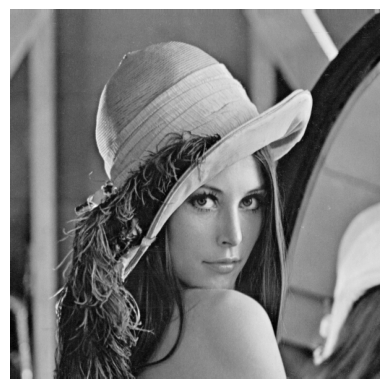

In [3]:
gray_image = image.convert("L")
plt.imshow(gray_image, cmap="gray")
plt.axis('off')
plt.show()

## 2.将灰度图分块并展平

In [114]:
new_block_width = 64
new_block_height = 4096
width, height = gray_image.size
blocks = []

for y in range(0, height, 8):
    for x in range(0, width, 8):
        block = gray_image.crop((x, y, x + 8, y + 8))
        blocks.append(block)

block_vectors = [np.array(block).flatten() for block in blocks]
blocks_array = np.array(block_vectors).T

In [115]:
blocks_array

array([[162, 165, 157, ...,  84,  52,  57],
       [162, 161, 156, ...,  82,  49,  51],
       [162, 162, 161, ...,  75,  52,  61],
       ...,
       [159, 153, 153, ...,  41,  72, 104],
       [156, 153, 152, ...,  42,  76, 105],
       [157, 151, 152, ...,  50,  83, 108]], dtype=uint8)

## 3.使用oja's PCA

### 3.1PCA模型

In [116]:
def oja_pca(X, components, epochs=50, lr=1e-8):
    num_features, num_samples = X.shape
    w = np.random.rand(num_features, components)
    w = train_oja_pca(X, w, epochs, lr)
    return w

def train_oja_pca(X, w, epochs, lr):
    num_samples = X.shape[1]
    for epoch in range(epochs):
        for col in range(4096):
            x = X[:, col].reshape(-1, 1)
            w_old = w
            y = w_old.T @ x
            w_new = w_old + lr * ((x - w_old @ y) @ y.T)
            w = w_new
        print(f"epochs {epoch + 1} norm: {np.linalg.norm(w, ord=2)}")
    w = w / np.linalg.norm(w, axis=0)
    return w

### 3.2解压复原展示

In [122]:
def show_image(X, w):
    num_components = w.shape[1]
    y = w.T @ X
    X_compress = (w @ y).T
    Img_blocks = []
    width, height = 512,512

    for x in X_compress:
        block = x.reshape((8, 8))
        Img_blocks.append(block)
    block_size = 8
    Img_arrays = np.zeros((height, width))
    idx = 0
    for x in range(0, height, block_size):
        for y in range(0, width, block_size):
            Img_arrays[x:x+block_size, y:y+block_size] = Img_blocks[idx]
            idx += 1
    #Img_arrays = np.rot90(Img_arrays, k=3)
    #Img_arrays = np.fliplr(Img_arrays)
    image = Image.fromarray(Img_arrays)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## 4.运行

### 4.1尝试提取1个主成分

In [118]:
resulting_w = oja_pca(blocks_array,1)

epochs 1 norm: 1.0000341081328346
epochs 2 norm: 1.0000341081328346
epochs 3 norm: 1.0000341081328346
epochs 4 norm: 1.0000341081328346
epochs 5 norm: 1.0000341081328346
epochs 6 norm: 1.0000341081328346
epochs 7 norm: 1.0000341081328346
epochs 8 norm: 1.0000341081328346
epochs 9 norm: 1.0000341081328346
epochs 10 norm: 1.0000341081328346
epochs 11 norm: 1.0000341081328346
epochs 12 norm: 1.0000341081328346
epochs 13 norm: 1.0000341081328346
epochs 14 norm: 1.0000341081328346
epochs 15 norm: 1.0000341081328346
epochs 16 norm: 1.0000341081328346
epochs 17 norm: 1.0000341081328346
epochs 18 norm: 1.0000341081328346
epochs 19 norm: 1.0000341081328346
epochs 20 norm: 1.0000341081328346
epochs 21 norm: 1.0000341081328346
epochs 22 norm: 1.0000341081328346
epochs 23 norm: 1.0000341081328346
epochs 24 norm: 1.0000341081328346
epochs 25 norm: 1.0000341081328346
epochs 26 norm: 1.0000341081328346
epochs 27 norm: 1.0000341081328346
epochs 28 norm: 1.0000341081328346
epochs 29 norm: 1.00003410813

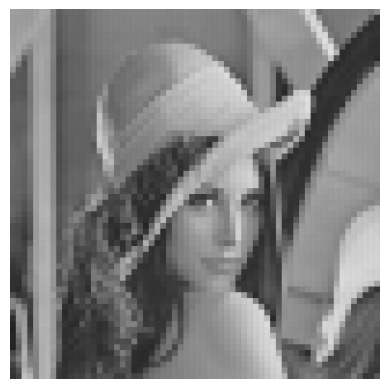

In [123]:
show_image(blocks_array, resulting_w)

### 4.2尝试两个主成分

In [124]:
resulting_w = oja_pca(blocks_array,2)

epochs 1 norm: 2.2261396906257356
epochs 2 norm: 2.167062292659178
epochs 3 norm: 2.101764930664231
epochs 4 norm: 2.025396392637656
epochs 5 norm: 1.9320302612718667
epochs 6 norm: 1.8165016370145919
epochs 7 norm: 1.6784015283158846
epochs 8 norm: 1.5264278295933245
epochs 9 norm: 1.3779606445811061
epochs 10 norm: 1.2512158310856458
epochs 11 norm: 1.1561499113964175
epochs 12 norm: 1.0921957179409567
epochs 13 norm: 1.0525447203548783
epochs 14 norm: 1.0292924614828316
epochs 15 norm: 1.0161286119793587
epochs 16 norm: 1.008832013080639
epochs 17 norm: 1.0048368870147801
epochs 18 norm: 1.0026646252312297
epochs 19 norm: 1.00148811780894
epochs 20 norm: 1.0008522997369858
epochs 21 norm: 1.0005090969574844
epochs 22 norm: 1.00032396393814
epochs 23 norm: 1.0002241338312292
epochs 24 norm: 1.000170311736747
epochs 25 norm: 1.000141295371666
epochs 26 norm: 1.000125650529055
epochs 27 norm: 1.000117213244842
epochs 28 norm: 1.000112661412572
epochs 29 norm: 1.0001102046118746
epochs 

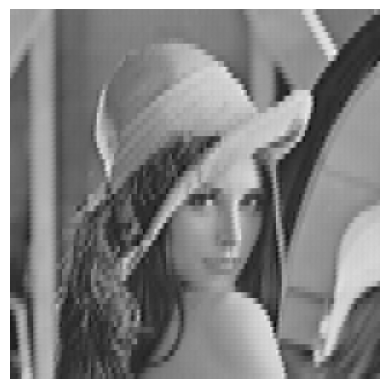

In [125]:
show_image(blocks_array, resulting_w)

### 4.3三个主成分

In [127]:
resulting_w = oja_pca(blocks_array,3)

epochs 1 norm: 2.590593707602254
epochs 2 norm: 2.4758215835921678
epochs 3 norm: 2.359893441396845
epochs 4 norm: 2.2371825887262644
epochs 5 norm: 2.1022205119105344
epochs 6 norm: 1.952516898154825
epochs 7 norm: 1.795613188691196
epochs 8 norm: 1.6629377441848043
epochs 9 norm: 1.5746509401397857
epochs 10 norm: 1.5061021901583638
epochs 11 norm: 1.4458722188765163
epochs 12 norm: 1.3913025310367717
epochs 13 norm: 1.3416279769696149
epochs 14 norm: 1.2965529376199818
epochs 15 norm: 1.2559024998964519
epochs 16 norm: 1.219514369145577
epochs 17 norm: 1.1872017189631539
epochs 18 norm: 1.1587425369902935
epochs 19 norm: 1.1338808439531913
epochs 20 norm: 1.1123337161207871
epochs 21 norm: 1.0938009299857245
epochs 22 norm: 1.0779752542453258
epochs 23 norm: 1.0645520925635406
epochs 24 norm: 1.0532376749493404
epochs 25 norm: 1.043755393489287
epochs 26 norm: 1.0358501898819452
epochs 27 norm: 1.029291124106125
epochs 28 norm: 1.0238723887100631
epochs 29 norm: 1.0194130943436843
e

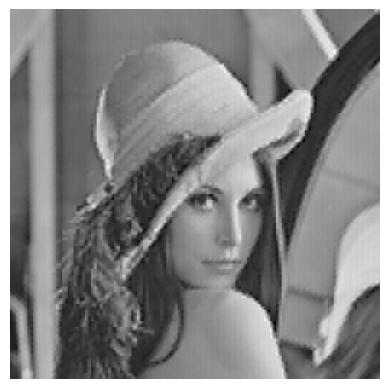

In [128]:
show_image(blocks_array, resulting_w)